# Imports: These lines import necessary libraries:
* numpy : numerical operations.
* seaborn : statistical data visualization.
* load_img & img_to_array from keras.preprocessing.image : loading and processing images.
* matplotlib.pyplot as plt : plotting images.
* os : interacting with the operating system to handle file paths.


In [15]:
# display some images for every different expression
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

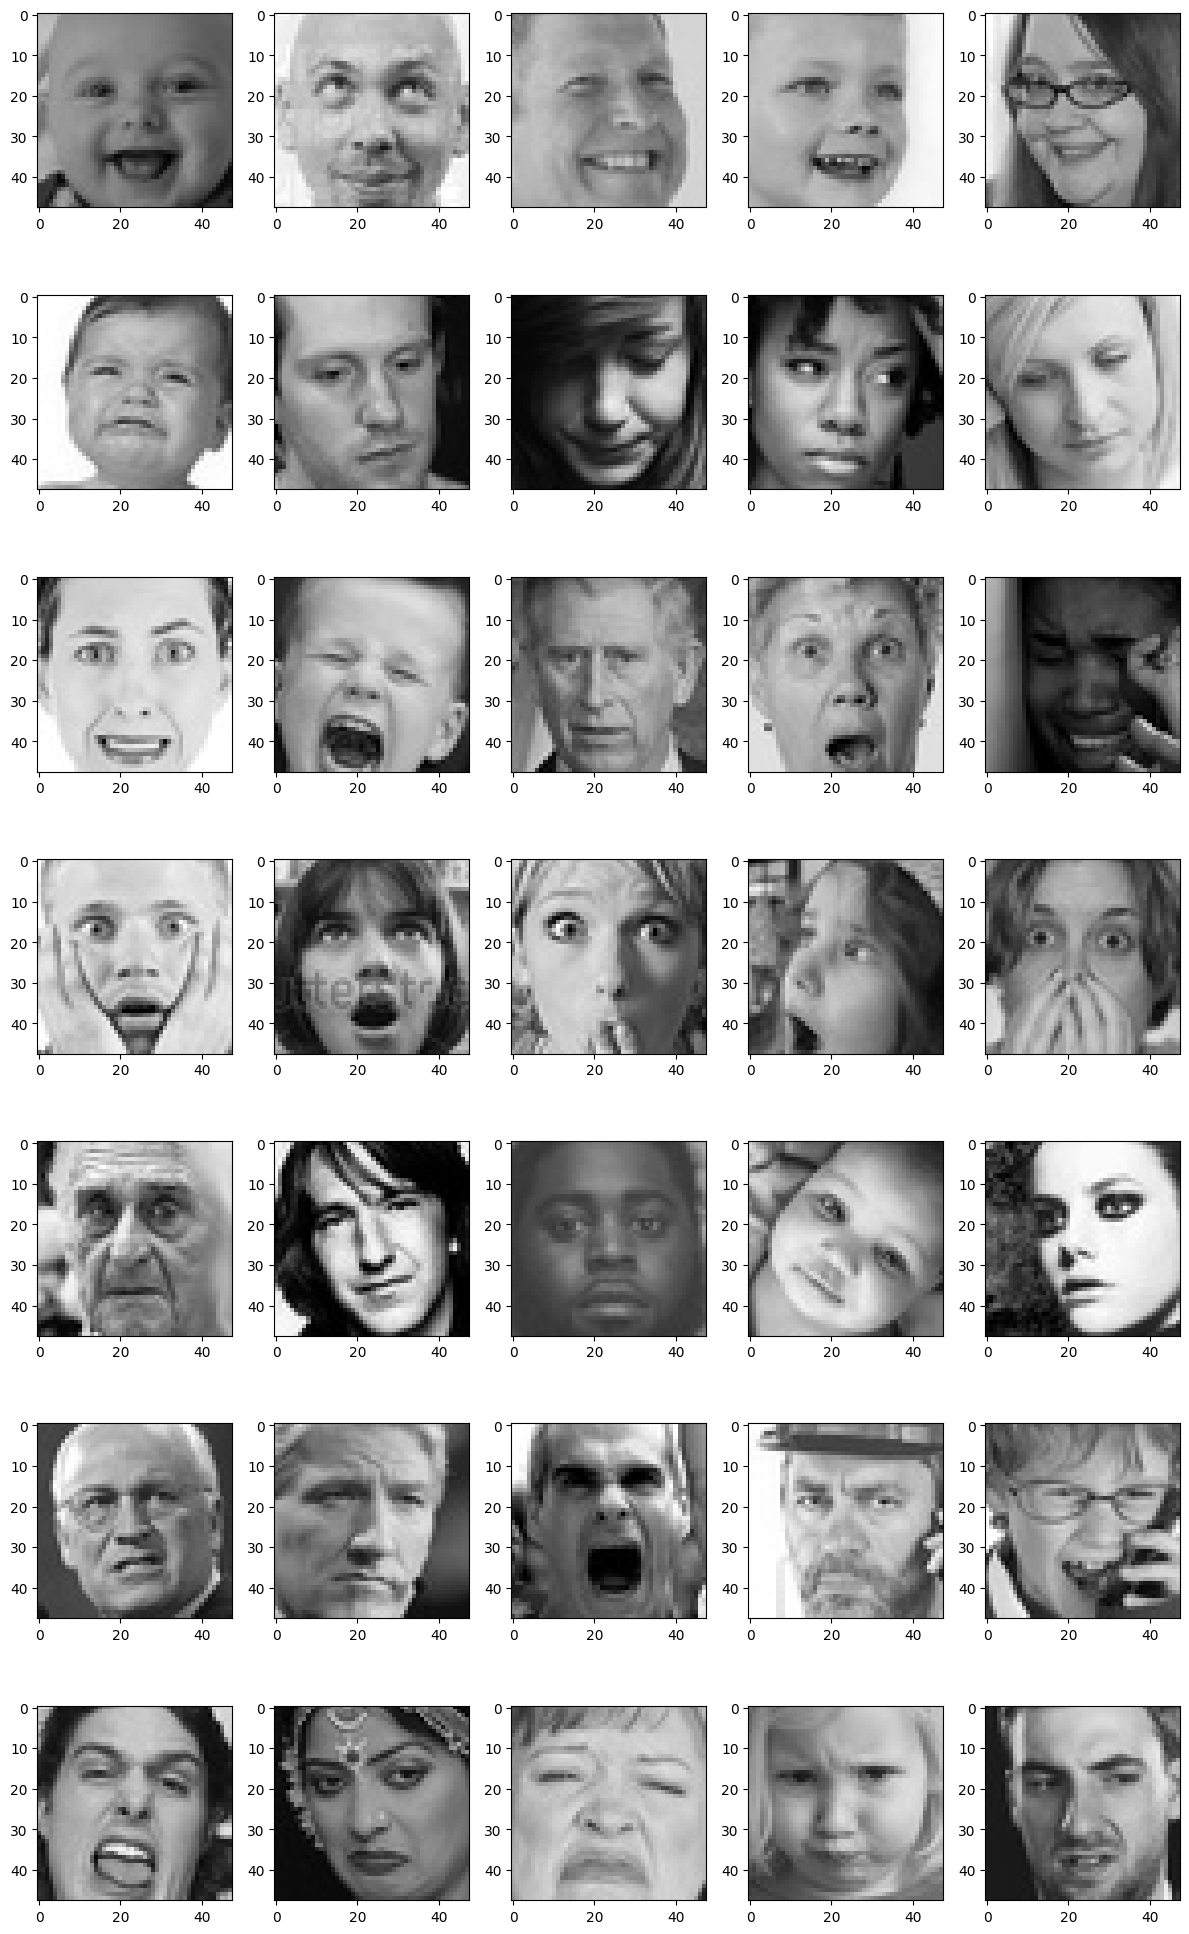

In [16]:
# size of the image: 48*48 pixels
pic_size = 48                            #Specifies the size of each image (48x48 pixels in this case)

# input path for the images
base_path = "/Users/pratiksha/Downloads/Face_expression/images/"

plt.figure(0, figsize=(12,20)) # Specifies the size of the plot
cpt = 0                        # Used to count the number of images displayed -- Counter variable


for expression in os.listdir(base_path + "train/"):                    # Iterates through each expression folder (angry, disgust, etc.) within the train directory.
    expression_path = os.path.join(base_path, "train", expression)
    if not os.path.isdir(expression_path):
        continue  # Skip if it's not a directory

    for i, img_file in enumerate(os.listdir(expression_path)[:5]):     # Loops through the first 5 images (i ranges from 1 to 5) within each expression folder.
        cpt = cpt + 1                                                  # Increments the counter variable
        plt.subplot(7, 5, cpt)                                         # Creates a subplot grid with 7 rows and 5 columns, placing the current image in position cpt.
        img_path = os.path.join(expression_path, img_file)
        img = load_img(img_path, target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")                                   # Displays the image with a grayscale colormap.

plt.tight_layout()  

                                            

- Identifying facial expressions from images is challenging for algorithms due to factors like :
* the images have a low resolution
* the faces are not in the same position
* some images have text written on them
* some people hide part of their faces with their hands
- However all this diversity of images will contribute to make a more generalizable model.

In [17]:
for expression in os.listdir(os.path.join(base_path, "train")):        
         #Iterates through each expression folder (angry, disgust, etc.) within the train directory

    expression_path = os.path.join(base_path, "train", expression)
    if not os.path.isdir(expression_path):                     
        continue  # Skip non-directory files like .DS_Store

    # Count and print the number of images in each expression folder
    num_images = len(os.listdir(expression_path))      # Counts the number of images in the current expression folder
    print(f"{num_images} {expression} images")         # Prints the number of images in the current expression folder


7164 happy images
4938 sad images
4103 fear images
3205 surprise images
4982 neutral images
3993 angry images
436 disgust images


- The image expressions in our training dataset are pretty balanced, except for the 'disgust' category.

# Setup the data generators : Setting up data generators in Keras using ImageDataGenerator allows efficient loading and preprocessing of image data for training and validation. 

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Defining base path
base_path = "/Users/pratiksha/Downloads/Face_expression/"


# number of images to feed into the NN for every batch
batch_size = 128                  #Specifies the number of images to feed into the neural network for every batch during training and validation.

datagen_train = ImageDataGenerator()                
datagen_validation = ImageDataGenerator()

# Creates instances of ImageDataGenerator for training (datagen_train) and validation (datagen_validation). 
# These generators will handle data augmentation, scaling, and other preprocessing tasks.

train_generator = datagen_train.flow_from_directory(base_path + "train",            # flow_from_directory: Generates batches of augmented/normalized data from image files in the train directory.
                                                    target_size=(pic_size,pic_size), # Resizes images to (pic_size, pic_size) pixels.
                                                    color_mode="grayscale",           # Converts images to grayscale format.
                                                    batch_size=batch_size,            # Number of images per batch to be yielded from the generator.
                                                    class_mode='categorical',         # Returns one-hot encoded labels for multi-class classification.
                                                    shuffle=True)                     #  Shuffles the order of images after every epoch.

validation_generator = datagen_validation.flow_from_directory(base_path + "validation", # fetches batches of validation data from the validation directory.
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


- Deep learning models are trained by being fed with batches of data. Keras has a very useful class to automatically feed data from a directory: ImageDataGenerator.

- It can also perform data augmentation while getting the images (randomly rotating the image, zooming, etc.). This method is often used as a way to artificially get more data when the dataset has a small size.

- The function flow_from_directory() specifies how the generator should import the images (path, image size, colors, etc.).

* Found 28821 images belonging to 7 classes: indicates that in the training dataset (base_path + "train"), there are a total of 28,821 images distributed among 7 classes.
* Found 7066 images belonging to 7 classes: Similarly, in your validation dataset (base_path + "validation"), there are 7,066 images also distributed among the same 7 classes.


1. Initial Image Checking: Earlier, we used a loop to display a subset of images (specifically, the first 5 images) from each expression category (angry, disgust, fear, happy, neutral, sad, surprise) in the training data. This was likely done to visually inspect the data and ensure that images are loaded correctly and represent different facial expressions.

2. Setting up Data Generators: After verifying the data, we proceeded to set up 'ImageDataGenerator' instances for both training and validation datasets. These generators will be used to feed batches of images into your neural network during the training process.

3. Batch Size: We specified a batch_size of 128 when setting up the train_generator and validation_generator. This means that during training, the neural network will process 128 images at a time (or as many as can fit into memory for the hardware configuration). This batch size is a common parameter in deep learning training and affects how many images are processed before updating the model's weights.

## QUESTIONS:
1. USE of 'train_generator' & 'validation_generator' : 
- Instances of ImageDataGenerator from Keras that handle data preprocessing and augmentation (if specified). 
- They generate batches of images and their corresponding labels directly from directories of images, allowing you to work with large datasets that don't fit into memory.
- 'train_generator' : used during the training phase of your neural network. It provides batches of images to the model, allowing it to update its weights based on the gradients computed from these batches.
- validation_generator : used to evaluate the model's performance on a separate set of data that the model hasn't seen during training. It helps monitor the model's generalization ability and prevents overfitting.

2. BATCH SIZE:
- Batch size refers to the number of samples (images, in this case) that the model processes at a time before updating the weights.
When you set batch_size=128, the model will process 128 images in each iteration (batch) during training.
Benefits:

* Efficiency: Processing data in batches is more memory efficient. Instead of loading all images into memory at once, which may not be feasible for large datasets, batches allow you to work with manageable chunks.
* Gradient Descent: Batch processing allows for more stable gradient descent updates. It computes gradients based on the average loss across the batch, providing smoother convergence towards the optimal weights.

## Setting up our Convolutional Neural Network (CNN)

In [19]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()  # initializes an empty sequential model.  

# 1 - Convolution 
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))         #
# #Each model.add() call adds a layer to the network in sequence and Conv2D: Adds a 2D convolutional layer
model.add(BatchNormalization())                                              #BatchNormalization: Adds batch normalization to stabilize and speed up training.
model.add(Activation('relu'))                                                #Adds an activation function (ReLU in this case) to introduce non-linearity.
model.add(MaxPooling2D(pool_size=(2, 2)))                                    #MaxPooling2D: Adds a max-pooling layer to down-sample the input.
model.add(Dropout(0.25))                                                     #Dropout: Adds a dropout layer for regularization.

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same')) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Output layer
model.add(Dense(nb_classes, activation='softmax'))
opt = Adam(learning_rate=0.0001)                                                                 #optimizer: Specifies the optimizer (Adam in this case) to use for training.
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])   #metrics: Specifies the metrics to evaluate the model (accuracy in this case).
     #loss: Specifies the loss function (categorical crossentropy for multi-class classification).
     #categorical_crossentropy : Computes the cross-entropy loss between true labels and predicted labels.
     #crossentropy : measures the performance of a classification model whose output is a probability value between 0 and 1.


/Users/pratiksha/.pyenv/versions/3.9.19/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
%%time
# This calculates the time taken to execute the cell. It's useful for measuring performance.

epochs = 50
# Specifies the number of epochs to train the model. Each epoch means one complete pass through the entire training dataset.

from keras.callbacks import ModelCheckpoint
# Imports the ModelCheckpoint class from keras.callbacks. This is used to save the model at certain points during training.

# Define the checkpoint to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    "model_weights.keras",  # The file path where the model weights will be saved. Updated to end with .keras for clarity.
    monitor='val_accuracy',  # Metric to be monitored. 'val_accuracy' means validation accuracy.
    verbose=1,  # Verbosity mode. 1 means that messages will be printed when the model is being saved.
    save_best_only=True,  # If True, the latest best model according to the monitored metric will not be overwritten.
    mode='max'  # Mode for the monitored metric. 'max' means that the model will be saved when the quantity monitored has stopped increasing.
)
callbacks_list = [checkpoint]
# A list of callbacks to pass to the model during training. Here, it contains only the checkpoint callback.

# Train the model using model.fit instead of model.fit_generator
history = model.fit(
    x=train_generator,  # The training data. Here, train_generator is used to provide batches of data during training.
    epochs=epochs,  # The number of epochs to train the model.
    steps_per_epoch=train_generator.n // train_generator.batch_size,  
    # The number of steps per epoch. This is the total number of samples in the training data divided by the batch size.
    
    validation_data=validation_generator,  # The validation data. Here, validation_generator is used to provide batches of validation data.
    validation_steps=validation_generator.n // validation_generator.batch_size,  
    # The number of validation steps per epoch. This is the total number of samples in the validation data divided by the batch size.
    
    callbacks=callbacks_list  # List of callbacks to apply during training. Here, it includes the checkpoint callback to save the best model.
)

# Explanation for validation_generator.n // validation_generator.batch_size:
# This calculates the number of batches (steps) needed to go through the entire validation dataset once.
# - validation_generator.n is the total number of samples in the validation dataset.
# - validation_generator.batch_size is the number of samples in each batch.
# The integer division (//) ensures we get the whole number of batches. For example, if there are 1000 validation samples and the batch size is 32,
# this would be 1000 // 32 = 31 steps per epoch for validation.


Epoch 1/50


/Users/pratiksha/.pyenv/versions/3.9.19/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2073 - loss: 2.1422
Epoch 1: val_accuracy improved from -inf to 0.32798, saving model to model_weights.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.2074 - loss: 2.1417 - val_accuracy: 0.3280 - val_loss: 1.7103
Epoch 2/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 4:30 1s/step - accuracy: 0.3516 - loss: 1.7176
Epoch 2: val_accuracy did not improve from 0.32798
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 362us/step - accuracy: 0.3516 - loss: 1.7176 - val_accuracy: 0.1538 - val_loss: 2.1744
Epoch 3/50


2024-07-13 11:22:40.217431: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/pratiksha/.pyenv/versions/3.9.19/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-07-13 11:22:40.280694: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2896 - loss: 1.8364
Epoch 3: val_accuracy improved from 0.32798 to 0.36108, saving model to model_weights.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.2897 - loss: 1.8362 - val_accuracy: 0.3611 - val_loss: 1.6276
Epoch 4/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 4:13 1s/step - accuracy: 0.3984 - loss: 1.5795
Epoch 4: val_accuracy did not improve from 0.36108
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 302us/step - accuracy: 0.3984 - loss: 1.5795 - val_accuracy: 0.2308 - val_loss: 2.4363
Epoch 5/50


2024-07-13 11:27:17.047983: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 11:27:17.106548: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3364 - loss: 1.7419
Epoch 5: val_accuracy improved from 0.36108 to 0.36875, saving model to model_weights.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.3364 - loss: 1.7418 - val_accuracy: 0.3688 - val_loss: 1.6647
Epoch 6/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 4:41 1s/step - accuracy: 0.3203 - loss: 1.7144
Epoch 6: val_accuracy did not improve from 0.36875
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 283us/step - accuracy: 0.3203 - loss: 1.7144 - val_accuracy: 0.3462 - val_loss: 2.5773
Epoch 7/50


2024-07-13 11:32:05.755110: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 11:32:05.810512: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3707 - loss: 1.6392
Epoch 7: val_accuracy improved from 0.36875 to 0.37898, saving model to model_weights.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.3707 - loss: 1.6392 - val_accuracy: 0.3790 - val_loss: 1.6733
Epoch 8/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 4:44 1s/step - accuracy: 0.3984 - loss: 1.6200
Epoch 8: val_accuracy did not improve from 0.37898
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 282us/step - accuracy: 0.3984 - loss: 1.6200 - val_accuracy: 0.2692 - val_loss: 2.7431
Epoch 9/50


2024-07-13 11:36:47.222446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 11:36:47.277952: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3912 - loss: 1.5898
Epoch 9: val_accuracy improved from 0.37898 to 0.43153, saving model to model_weights.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.3912 - loss: 1.5898 - val_accuracy: 0.4315 - val_loss: 1.4856
Epoch 10/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 4:53 1s/step - accuracy: 0.4141 - loss: 1.5514
Epoch 10: val_accuracy improved from 0.43153 to 0.53846, saving model to model_weights.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - accuracy: 0.4141 - loss: 1.5514 - val_accuracy: 0.5385 - val_loss: 1.7183
Epoch 11/50


2024-07-13 11:41:32.517585: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 11:41:32.585363: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4063 - loss: 1.5411
Epoch 11: val_accuracy did not improve from 0.53846
225/225 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.4064 - loss: 1.5411 - val_accuracy: 0.4234 - val_loss: 1.5737
Epoch 12/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 4:05 1s/step - accuracy: 0.4062 - loss: 1.4787
Epoch 12: val_accuracy did not improve from 0.53846
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 284us/step - accuracy: 0.4062 - loss: 1.4787 - val_accuracy: 0.4615 - val_loss: 1.9037
Epoch 13/50


2024-07-13 11:46:01.161371: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 11:46:01.216907: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4336 - loss: 1.4711
Epoch 13: val_accuracy did not improve from 0.53846
225/225 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.4336 - loss: 1.4712 - val_accuracy: 0.4565 - val_loss: 1.3929
Epoch 14/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 4:18 1s/step - accuracy: 0.4453 - loss: 1.6659
Epoch 14: val_accuracy improved from 0.53846 to 0.57692, saving model to model_weights.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - accuracy: 0.4453 - loss: 1.6659 - val_accuracy: 0.5769 - val_loss: 1.4494
Epoch 15/50


2024-07-13 11:50:26.118791: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 11:50:26.171744: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4505 - loss: 1.4316
Epoch 15: val_accuracy did not improve from 0.57692
225/225 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.4505 - loss: 1.4316 - val_accuracy: 0.4730 - val_loss: 1.3971
Epoch 16/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 4:22 1s/step - accuracy: 0.4766 - loss: 1.5080
Epoch 16: val_accuracy did not improve from 0.57692
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 286us/step - accuracy: 0.4766 - loss: 1.5080 - val_accuracy: 0.5769 - val_loss: 1.4649
Epoch 17/50


2024-07-13 11:54:48.302399: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 11:54:48.357099: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4655 - loss: 1.3963
Epoch 17: val_accuracy did not improve from 0.57692
225/225 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.4655 - loss: 1.3963 - val_accuracy: 0.4820 - val_loss: 1.3749
Epoch 18/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 4:11 1s/step - accuracy: 0.5234 - loss: 1.2140
Epoch 18: val_accuracy did not improve from 0.57692
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 291us/step - accuracy: 0.5234 - loss: 1.2140 - val_accuracy: 0.5385 - val_loss: 1.4373
Epoch 19/50


2024-07-13 11:59:10.925367: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 11:59:10.981581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4795 - loss: 1.3604
Epoch 19: val_accuracy did not improve from 0.57692
225/225 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.4795 - loss: 1.3604 - val_accuracy: 0.5055 - val_loss: 1.3027
Epoch 20/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 4:05 1s/step - accuracy: 0.5312 - loss: 1.2757
Epoch 20: val_accuracy did not improve from 0.57692
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 290us/step - accuracy: 0.5312 - loss: 1.2757 - val_accuracy: 0.5385 - val_loss: 1.3703
Epoch 21/50


2024-07-13 12:03:41.231891: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 12:03:41.287294: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4904 - loss: 1.3247
Epoch 21: val_accuracy did not improve from 0.57692
225/225 ━━━━━━━━━━━━━━━━━━━━ 414s 2s/step - accuracy: 0.4905 - loss: 1.3247 - val_accuracy: 0.5203 - val_loss: 1.2584
Epoch 22/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 7:22 2s/step - accuracy: 0.5312 - loss: 1.2334
Epoch 22: val_accuracy improved from 0.57692 to 0.69231, saving model to model_weights.keras


2024-07-13 12:10:37.143238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 12:10:37.233530: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5312 - loss: 1.2334 - val_accuracy: 0.6923 - val_loss: 0.9924
Epoch 23/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5063 - loss: 1.2924
Epoch 23: val_accuracy did not improve from 0.69231
225/225 ━━━━━━━━━━━━━━━━━━━━ 763s 3s/step - accuracy: 0.5063 - loss: 1.2924 - val_accuracy: 0.4911 - val_loss: 1.3719
Epoch 24/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 8:11 2s/step - accuracy: 0.4844 - loss: 1.1878
Epoch 24: val_accuracy did not improve from 0.69231
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 461us/step - accuracy: 0.4844 - loss: 1.1878 - val_accuracy: 0.5000 - val_loss: 1.6409
Epoch 25/50


2024-07-13 12:23:22.617132: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 12:23:22.702017: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5208 - loss: 1.2596
Epoch 25: val_accuracy did not improve from 0.69231
225/225 ━━━━━━━━━━━━━━━━━━━━ 531s 2s/step - accuracy: 0.5208 - loss: 1.2596 - val_accuracy: 0.5365 - val_loss: 1.2251
Epoch 26/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 9:43 3s/step - accuracy: 0.5547 - loss: 1.1912
Epoch 26: val_accuracy did not improve from 0.69231
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 556us/step - accuracy: 0.5547 - loss: 1.1912 - val_accuracy: 0.6538 - val_loss: 1.0248
Epoch 27/50


2024-07-13 12:32:16.778002: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 12:32:16.877767: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5241 - loss: 1.2428
Epoch 27: val_accuracy did not improve from 0.69231
225/225 ━━━━━━━━━━━━━━━━━━━━ 495s 2s/step - accuracy: 0.5242 - loss: 1.2428 - val_accuracy: 0.5364 - val_loss: 1.2321
Epoch 28/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 8:16 2s/step - accuracy: 0.6016 - loss: 1.1812
Epoch 28: val_accuracy did not improve from 0.69231
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 613us/step - accuracy: 0.6016 - loss: 1.1812 - val_accuracy: 0.6538 - val_loss: 1.0900
Epoch 29/50


2024-07-13 12:40:34.055929: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 12:40:34.148978: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5354 - loss: 1.2261
Epoch 29: val_accuracy did not improve from 0.69231
225/225 ━━━━━━━━━━━━━━━━━━━━ 1131s 5s/step - accuracy: 0.5354 - loss: 1.2260 - val_accuracy: 0.5355 - val_loss: 1.2302
Epoch 30/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 10:42 3s/step - accuracy: 0.5469 - loss: 1.2659
Epoch 30: val_accuracy did not improve from 0.69231
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 757us/step - accuracy: 0.5469 - loss: 1.2659 - val_accuracy: 0.6154 - val_loss: 1.2223
Epoch 31/50


2024-07-13 12:59:27.702366: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 12:59:27.839944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5511 - loss: 1.1821
Epoch 31: val_accuracy did not improve from 0.69231
225/225 ━━━━━━━━━━━━━━━━━━━━ 504s 2s/step - accuracy: 0.5511 - loss: 1.1821 - val_accuracy: 0.5656 - val_loss: 1.1613
Epoch 32/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 7:40 2s/step - accuracy: 0.5000 - loss: 1.3065
Epoch 32: val_accuracy did not improve from 0.69231
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 603us/step - accuracy: 0.5000 - loss: 1.3065 - val_accuracy: 0.6923 - val_loss: 0.8429
Epoch 33/50


2024-07-13 13:07:54.139920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 13:07:54.248404: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5498 - loss: 1.1835
Epoch 33: val_accuracy did not improve from 0.69231
225/225 ━━━━━━━━━━━━━━━━━━━━ 1282s 6s/step - accuracy: 0.5498 - loss: 1.1834 - val_accuracy: 0.5562 - val_loss: 1.1869
Epoch 34/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 7:53 2s/step - accuracy: 0.5234 - loss: 1.1908
Epoch 34: val_accuracy improved from 0.69231 to 0.84615, saving model to model_weights.keras


2024-07-13 13:29:18.321310: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 13:29:18.434886: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5234 - loss: 1.1908 - val_accuracy: 0.8462 - val_loss: 0.6430
Epoch 35/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5648 - loss: 1.1410
Epoch 35: val_accuracy did not improve from 0.84615
225/225 ━━━━━━━━━━━━━━━━━━━━ 522s 2s/step - accuracy: 0.5648 - loss: 1.1410 - val_accuracy: 0.5611 - val_loss: 1.1747
Epoch 36/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 8:36 2s/step - accuracy: 0.6016 - loss: 1.1871
Epoch 36: val_accuracy did not improve from 0.84615
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 613us/step - accuracy: 0.6016 - loss: 1.1871 - val_accuracy: 0.6923 - val_loss: 1.0372
Epoch 37/50


2024-07-13 13:38:02.665490: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 13:38:02.779094: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.5703 - loss: 1.1279 
Epoch 37: val_accuracy did not improve from 0.84615
225/225 ━━━━━━━━━━━━━━━━━━━━ 3028s 14s/step - accuracy: 0.5703 - loss: 1.1279 - val_accuracy: 0.5695 - val_loss: 1.1389
Epoch 38/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 7:54 2s/step - accuracy: 0.5703 - loss: 1.1061
Epoch 38: val_accuracy did not improve from 0.84615
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 679us/step - accuracy: 0.5703 - loss: 1.1061 - val_accuracy: 0.6154 - val_loss: 1.0974
Epoch 39/50


2024-07-13 14:28:32.616215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 14:28:32.731651: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5752 - loss: 1.1130
Epoch 39: val_accuracy did not improve from 0.84615
225/225 ━━━━━━━━━━━━━━━━━━━━ 1421s 6s/step - accuracy: 0.5752 - loss: 1.1130 - val_accuracy: 0.5827 - val_loss: 1.1046
Epoch 40/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 8:37 2s/step - accuracy: 0.5391 - loss: 1.1133
Epoch 40: val_accuracy did not improve from 0.84615
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 586us/step - accuracy: 0.5391 - loss: 1.1133 - val_accuracy: 0.8077 - val_loss: 0.7456
Epoch 41/50


2024-07-13 14:52:16.352394: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 14:52:16.459424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5825 - loss: 1.0866
Epoch 41: val_accuracy did not improve from 0.84615
225/225 ━━━━━━━━━━━━━━━━━━━━ 539s 2s/step - accuracy: 0.5825 - loss: 1.0866 - val_accuracy: 0.5876 - val_loss: 1.1043
Epoch 42/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 8:07 2s/step - accuracy: 0.6172 - loss: 1.0679
Epoch 42: val_accuracy did not improve from 0.84615
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 480us/step - accuracy: 0.6172 - loss: 1.0679 - val_accuracy: 0.8462 - val_loss: 0.7007
Epoch 43/50


2024-07-13 15:01:17.969210: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 15:01:18.055131: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5921 - loss: 1.0727 
Epoch 43: val_accuracy did not improve from 0.84615
225/225 ━━━━━━━━━━━━━━━━━━━━ 2362s 11s/step - accuracy: 0.5921 - loss: 1.0727 - val_accuracy: 0.5597 - val_loss: 1.1802
Epoch 44/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 8:10 2s/step - accuracy: 0.6328 - loss: 0.9658
Epoch 44: val_accuracy improved from 0.84615 to 0.92308, saving model to model_weights.keras


2024-07-13 15:40:42.128092: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 15:40:42.233000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6328 - loss: 0.9658 - val_accuracy: 0.9231 - val_loss: 0.5155
Epoch 45/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5949 - loss: 1.0652
Epoch 45: val_accuracy did not improve from 0.92308
225/225 ━━━━━━━━━━━━━━━━━━━━ 1081s 5s/step - accuracy: 0.5949 - loss: 1.0652 - val_accuracy: 0.5936 - val_loss: 1.0930
Epoch 46/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 8:29 2s/step - accuracy: 0.6328 - loss: 0.9959
Epoch 46: val_accuracy did not improve from 0.92308
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 427us/step - accuracy: 0.6328 - loss: 0.9959 - val_accuracy: 0.7692 - val_loss: 0.8900
Epoch 47/50


2024-07-13 15:58:46.026855: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 15:58:46.106639: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6086 - loss: 1.0419
Epoch 47: val_accuracy did not improve from 0.92308
225/225 ━━━━━━━━━━━━━━━━━━━━ 1445s 6s/step - accuracy: 0.6086 - loss: 1.0420 - val_accuracy: 0.6087 - val_loss: 1.0563
Epoch 48/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 7:47 2s/step - accuracy: 0.5391 - loss: 1.1738
Epoch 48: val_accuracy did not improve from 0.92308
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 553us/step - accuracy: 0.5391 - loss: 1.1738 - val_accuracy: 0.6923 - val_loss: 1.0217
Epoch 49/50


2024-07-13 16:22:53.408067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 16:22:53.507811: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6157 - loss: 1.0270
Epoch 49: val_accuracy did not improve from 0.92308
225/225 ━━━━━━━━━━━━━━━━━━━━ 487s 2s/step - accuracy: 0.6157 - loss: 1.0270 - val_accuracy: 0.6060 - val_loss: 1.0667
Epoch 50/50
  1/225 ━━━━━━━━━━━━━━━━━━━━ 7:42 2s/step - accuracy: 0.6016 - loss: 1.0841
Epoch 50: val_accuracy did not improve from 0.92308
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 496us/step - accuracy: 0.6016 - loss: 1.0841 - val_accuracy: 0.7692 - val_loss: 0.7863
CPU times: user 15h 55min 28s, sys: 57min 28s, total: 16h 52min 57s
Wall time: 5h 13min 12s


2024-07-13 16:31:02.391755: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-13 16:31:02.482921: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


# Batch Size: This is the number of samples processed before the model's internal parameters are updated.
# We defined a batch size of 128.

# Total Batches: This is the total number of times the model updates its parameters in one epoch.
# The total number of batches is calculated as follows:
# Total Batches = Total Number of Samples / Batch Size

# If our dataset has 28,800 images and we have a batch size of 128, the total number of batches would be:
# Total Batches = 28,800 / 128 ≈ 225

# Thus, the total number of batches (225) is correct for a dataset of 28,800 images with a batch size of 128.
# This is why you see the progress output 34/225.


In [26]:
# Save Model Structure and Weights to JSON:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

# Plot Loss
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer: Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()


56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 631ms/step


<Figure size 640x480 with 0 Axes>

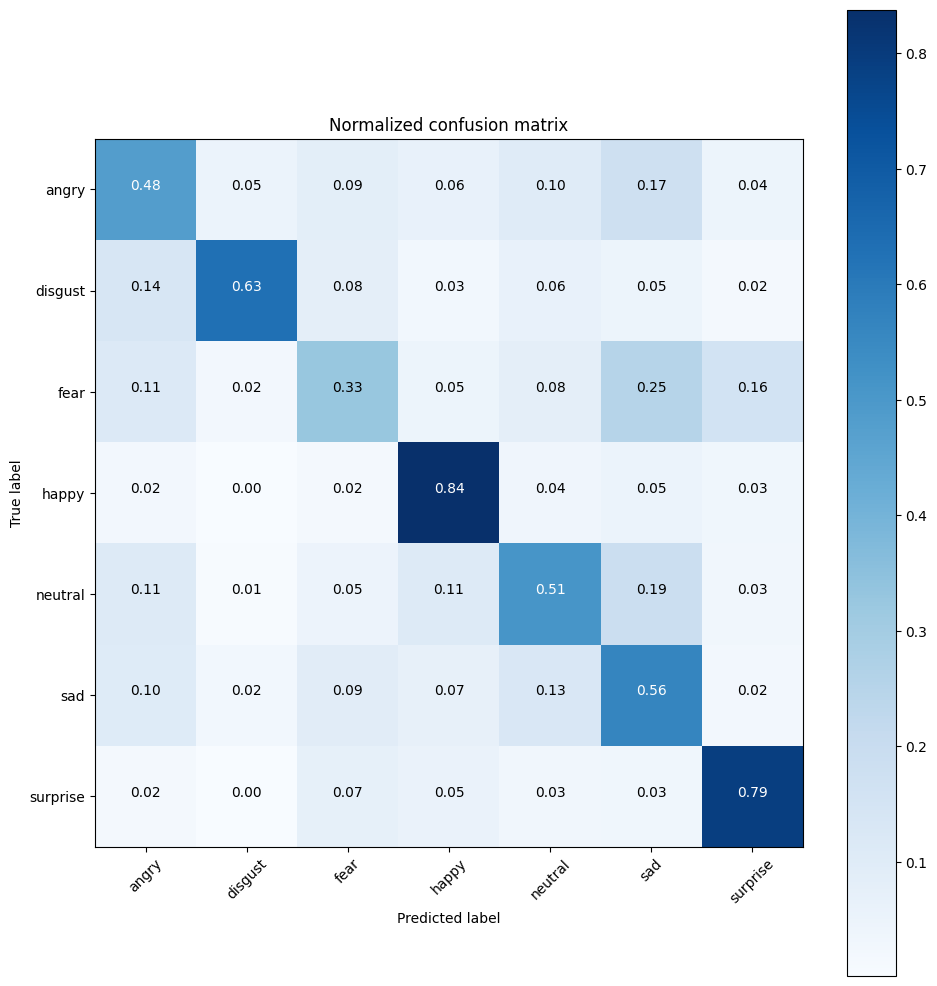

In [38]:
# Show the confusion matrix of our predictions

# Compute predictions
predictions = model.predict(validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = list(validation_generator.class_indices.keys())

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()


In [ ]:
Normalized Confusion Matrix:
[[0.48 0.05 0.09 0.06 0.10 0.17 0.04]   Class 0 angry
 [0.14 0.63 0.08 0.03 0.06 0.05 0.02]   Class 1 disgust
 [0.11 0.02 0.33 0.05 0.08 0.25 0.16]   Class 2 fear
 [0.02 0.00 0.02 0.84 0.04 0.05 0.03]   Class 3 happy
 [0.11 0.01 0.05 0.11 0.51 0.19 0.03]   Class 4 neutral
 [0.10 0.02 0.09 0.07 0.13 0.56 0.02]   Class 5 sad
 [0.02 0.00 0.07 0.05 0.03 0.03 0.79]]  Class 6 surprise


Class 0 (angry) has 48% correctly predicted, with notable confusion in Class 5 (sad) (17%).
Class 1 (disgust) has 63% correctly predicted, with some confusion in Class 0 (angry) (14%) and Class 2 (fear) (8%).
Class 2 (fear) has 33% correctly predicted, with significant confusion in Class 5 (sad) (25%) and Class 6 (surprise) (16%).
Class 3 (happy) has 84% correctly predicted, with some confusion in Class 0 (angry) (2%) and Class 4 (neutral) (4%).
Class 4 (neutral) has 51% correctly predicted, with notable confusion in Class 0 (angry) (11%) and Class 5 (sad) (19%).
Class 5 (sad) has 56% correctly predicted, with significant confusion in Class 4 (neutral) (13%) and Class 2 (fear) (9%).
Class 6 (surprise) has 79% correctly predicted, with some confusion in Class 2 (fear) (7%) and Class 0 (angry) (2%).


**Conclusion:**

Our model demonstrates strong predictive capabilities for happy and surprised facial expressions, achieving high accuracies of 84% and 79% respectively. However, it faces challenges in accurately distinguishing fear from sadness and neutral expressions from other emotions. Despite these complexities, the model represents a significant advancement compared to existing benchmarks in emotion recognition. Further research and optimization efforts could enhance its performance, making it more robust for real-world applications.

If you have any more questions or if there's anything else you'd like to explore, feel free to ask!